## Reference
- __[GeeksforGeeks: Collision Detection](https://www.geeksforgeeks.org/collision-detection-in-pygame/)__

In [17]:
# Import required libraries
import pygame
import random

# Initialize pygame objects
pygame.init()

# Define the colours
white = (255, 255, 255)
red   = (255, 0, 0)
green = (0, 255, 0)
blue  = (0, 0, 255)
black = (0, 0, 0)

# Set the dimensions & block
width  = 640
height = 640
pixel  = 64

# Set screen & caption
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("MARIO UNDER ATTACK!!")

# load the image
backgroundImg = pygame.image.load("../Python/Input/background.png")
loseImg       = pygame.image.load("../Python/Input/lose.png")
playerImage   = pygame.image.load("../Python/Input/mario.png")
blockImage    = pygame.image.load("../Python/Input/mushroom.png")

# Player's position
playerXPosition = (width/2) - (pixel/2)
playerYPosition = height - pixel - 10                # y pos is slightly above the base
playerXPositionChange = 0

# player's coordinate
def player(x, y):
    screen.blit(playerImage, (x, y))

# Block's random position
blockXPosition = random.randint(0, (width - pixel))
blockYPosition = 0 - pixel                           

# Block's speed
blockXPositionChange = 0
blockYPositionChange = 1

# Block's coordinates
def block(x, y):
    screen.blit(blockImage,(x, y))

# Collision
def crash():
    # take a global variable
    global blockYPosition
    
    # Horizontal collision
    if playerYPosition < (blockYPosition + pixel):                                                                     
        # Vertical collision
        # Block is at left side w.r.t player
    	if ((playerXPosition > blockXPosition              and playerXPosition < (blockXPosition + pixel))
            # Block is at right side w.r.t player
    		or ((playerXPosition + pixel) > blockXPosition and (playerXPosition + pixel) < (blockXPosition + pixel))):
            blockYPosition = height + 1000
            screen.blit(loseImg, (0, 0))

running = True
while running:
    # set the image on screen object
    screen.blit(backgroundImg, (0, 0))

    for event in pygame.event.get():
    	# check the quit condition
    	if event.type == pygame.QUIT:
    		running = False
            
    	# player's movement when keys are pressed
    	if event.type == pygame.KEYDOWN:    
    		if event.key == pygame.K_RIGHT:    
    			playerXPositionChange = 1    
    		if event.key == pygame.K_LEFT:    
    			playerXPositionChange = -1
        
        # player's movement when keys are not pressed
    	if event.type == pygame.KEYUP:    
    		if event.key == pygame.K_RIGHT or pygame.K_LEFT:    
    			playerXPositionChange = 0

    # Player's boundaries: player's doesn't exceed rightmost and leftmost position of the screen
    if playerXPosition >= (width - pixel):
        playerXPosition = (width - pixel) 
    if playerXPosition <= 0:
        playerXPosition = 0
    
    # Reset block's position once it gets below the screen
    if (blockYPosition >= height and blockYPosition <= (height + 200)):
        blockYPosition = 0 - pixel
        blockXPosition = random.randint(0, (width - pixel))
    
    # Player's and block's position
    playerXPosition += playerXPositionChange
    blockYPosition  += blockYPositionChange
    player(playerXPosition, playerYPosition)
    block(blockXPosition, blockYPosition)
    
    # crash function call
    crash()
    
    # update screen
    pygame.display.update()

# Quit game
pygame.quit()

### Concept
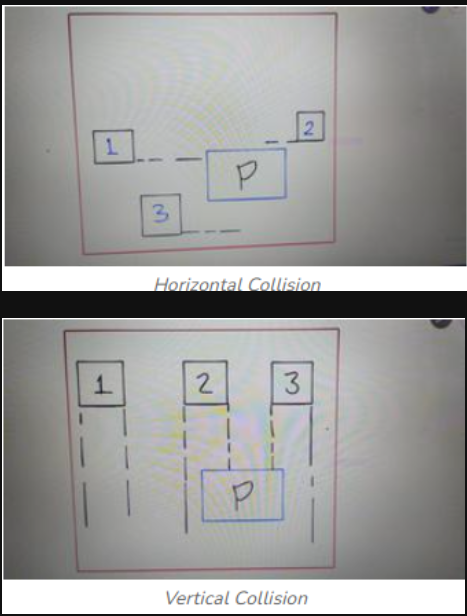

### Output
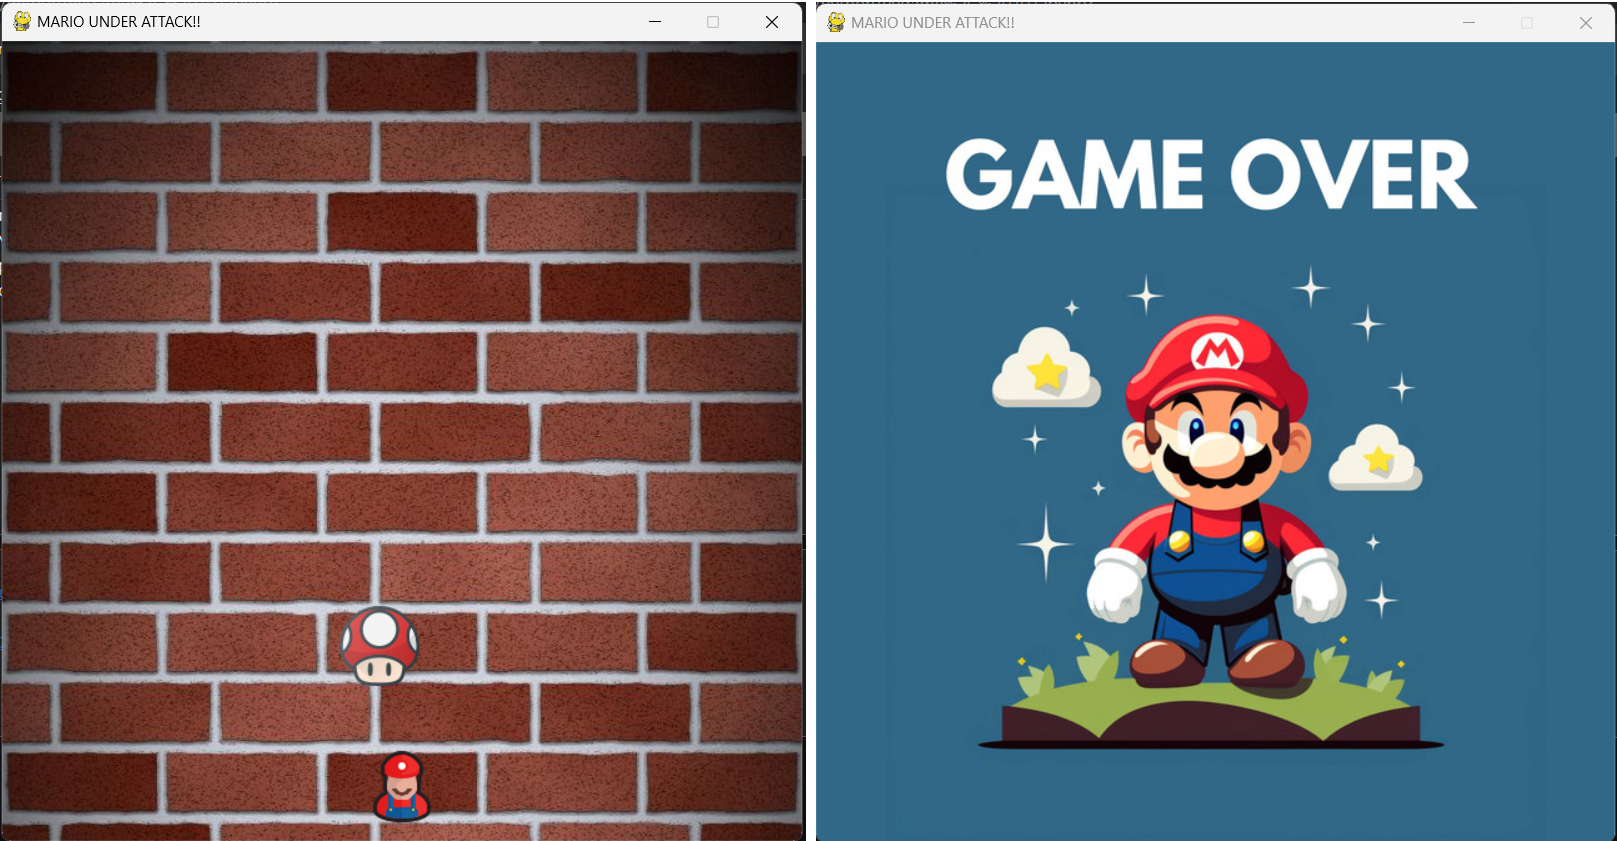